In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [2]:
import os

test_dir = 'archive/seg_test/seg_test/'
train_dir = 'archive/seg_train/seg_train/'
pred_dir = 'archive/seg_pred/seg_pred/'

possible_classes = ['buildings','forest','glacier','mountain','sea','street']
class_names_label = {possible_classes:i for i , possible_classes in enumerate(possible_classes)}

nb_classes = len(possible_classes)



In [3]:
IMAGE_SIZE = (150,150)

In [7]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical',
    
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [6]:
# for images, labels in train_generator:
#     labels = labels.reshape(-1,len(train_generator.class_indices))

# for images, labels in validation_generator:
#     labels = labels.reshape(-1,len(train_generator.class_indices))


KeyboardInterrupt: 

In [8]:
def create_model():

    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense((nb_classes), activation='softmax')
    ])

    model.compile(loss='categorical_crossentropy',
                  optimizer= 'adam',
                  metrics=['accuracy'])
    
    return model

In [9]:
model = create_model()
# model.summary()

history = model.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator)

Epoch 1/20
439/439 [==============================] - 191s 421ms/step - loss: 1.1821 - accuracy: 0.5247 - val_loss: 1.0341 - val_accuracy: 0.6027
Epoch 2/20
439/439 [==============================] - 61s 139ms/step - loss: 0.9612 - accuracy: 0.6305 - val_loss: 0.7621 - val_accuracy: 0.7220
Epoch 3/20
439/439 [==============================] - 62s 142ms/step - loss: 0.8489 - accuracy: 0.6849 - val_loss: 0.6704 - val_accuracy: 0.7557
Epoch 4/20
439/439 [==============================] - 68s 156ms/step - loss: 0.7675 - accuracy: 0.7178 - val_loss: 0.6289 - val_accuracy: 0.7730
Epoch 5/20
439/439 [==============================] - 65s 149ms/step - loss: 0.7162 - accuracy: 0.7343 - val_loss: 0.6373 - val_accuracy: 0.7760
Epoch 6/20
439/439 [==============================] - 72s 165ms/step - loss: 0.6905 - accuracy: 0.7499 - val_loss: 0.6005 - val_accuracy: 0.7763
Epoch 7/20
439/439 [==============================] - 71s 162ms/step - loss: 0.6481 - accuracy: 0.7635 - val_loss: 0.5533 - val_a

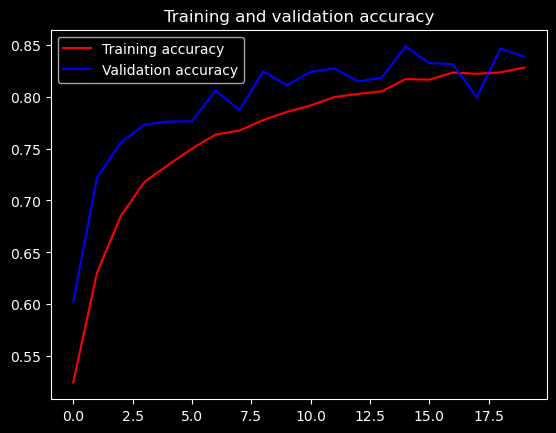

<Figure size 640x480 with 0 Axes>

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()